In [1]:
import google_trends as gt
# import auxiliary_functions as af
import matplotlib.pyplot as plt

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (25,6)

In [8]:
start = datetime(2014,1,1)
end = datetime(2014,6,30)
query='athens hotel'
test = gt.Query(query=query, start=start, end=end, days=7)

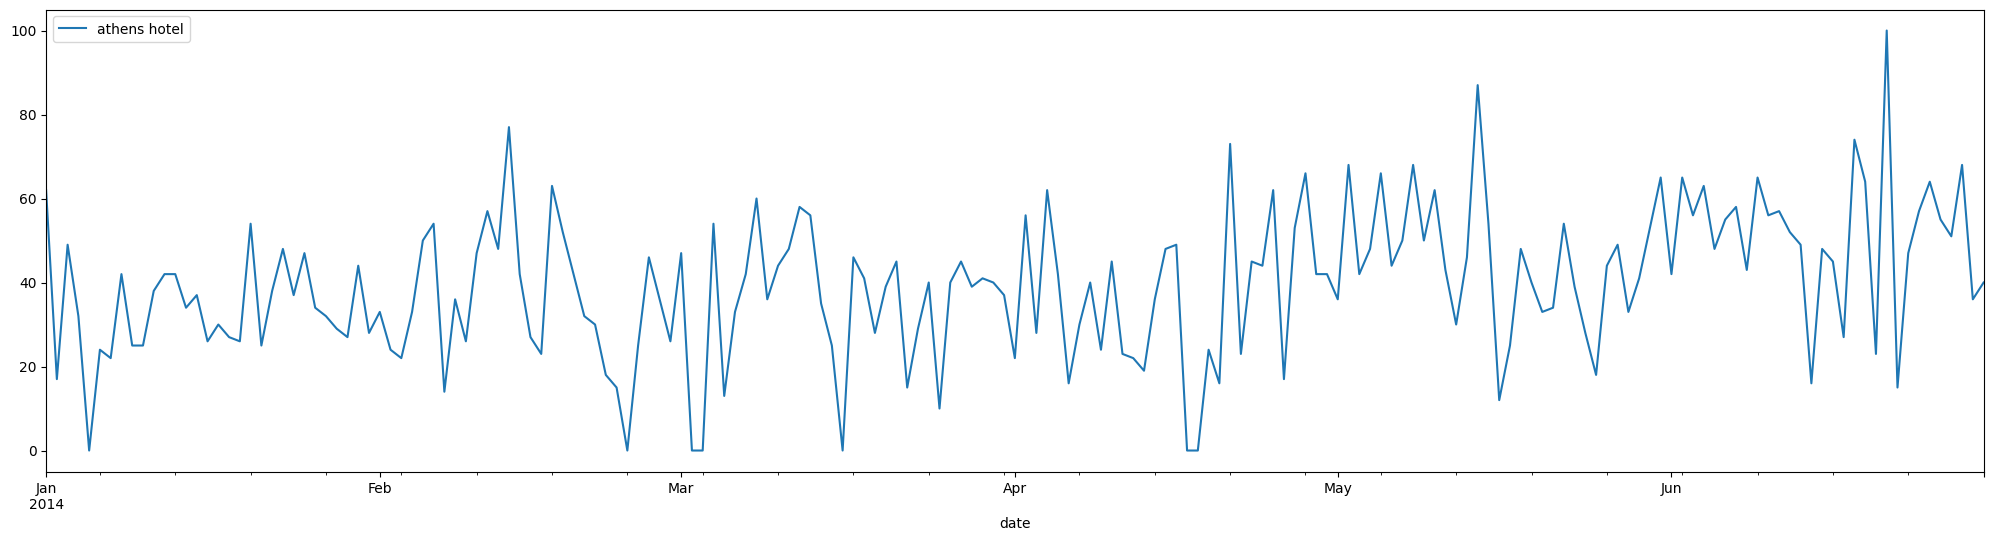

In [9]:
test.timeline.plot()
plt.show()

During the rescale step there might be occasions where there are no data to be collected from Google Trends. In order to avoid empty dataframes we found a workaround in the `fetch_dataframes` method to create empty dataframes containing 0s.

In [10]:
rescaled_test = test.rescale(test.timeline, start, end, query)

1/1 [==============================] - 0s 15ms/step


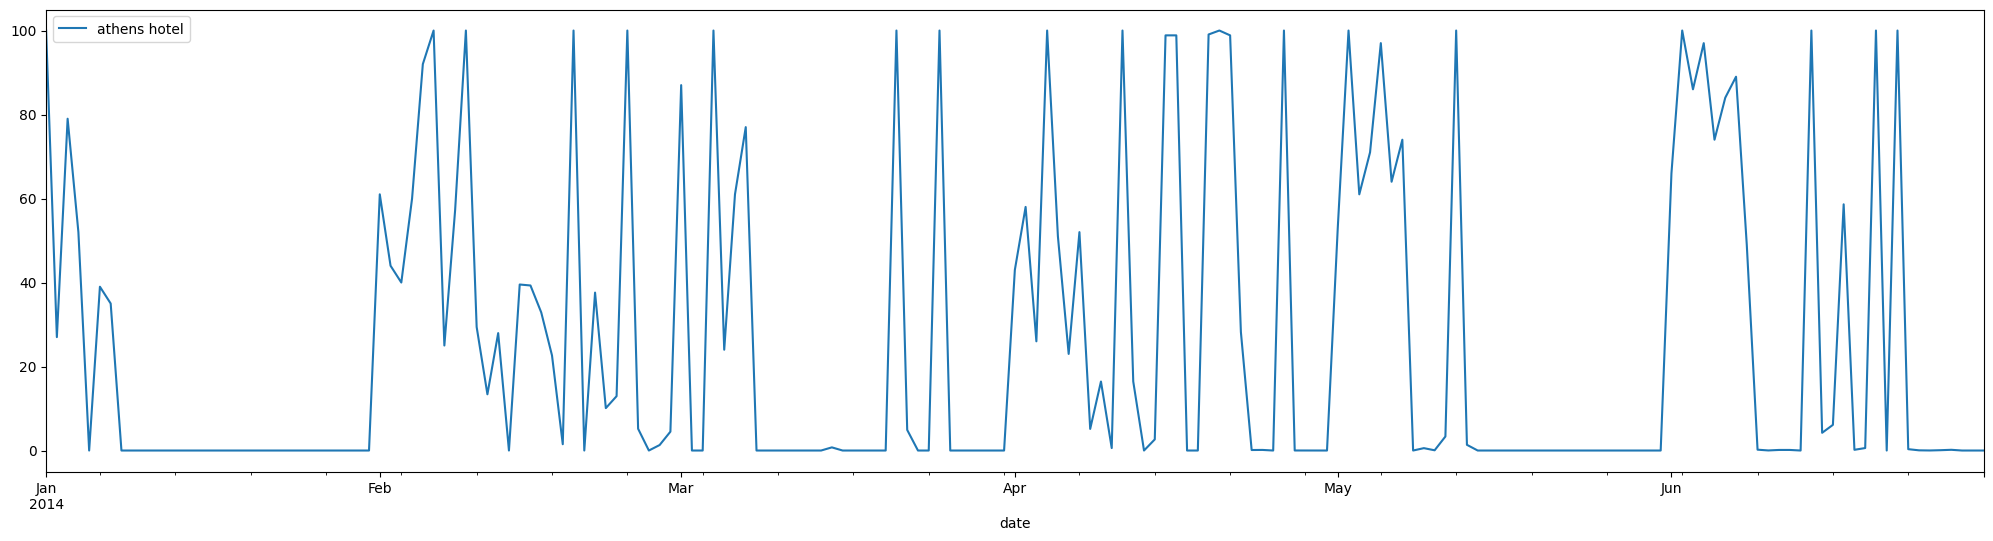

In [11]:
rescaled_test.plot()
plt.show()

In [12]:
error = gt.ErrorWrapper.error(rescaled_test, test.timeline, case='r2')
print(error)

-0.3497323939093808


In [13]:
error = gt.ErrorWrapper.error(rescaled_test, test.timeline, case='pearson')
print(error)

PearsonRResult(statistic=0.00029060517908983203, pvalue=0.9969021364013472)
